## Análisis de vibraciones

Script para analizar y visualizar los datos de vibraciones generados por voladuras, y evaluar su impacto en estructuras cercanas.

In [16]:
import numpy as np
import matplotlib.pyplot as plt

In [17]:
# Generación de datos de vibraciones
tiempo = np.linspace(0, 10, 10000)  # Tiempo en segundos
frecuencia_base = 10  # Frecuencia base de la vibración en Hz
amplitud_base = 0.2  # Amplitud base de la vibración
frecuencia_ruido = 200  # Frecuencia del ruido en Hz
amplitud_ruido = 0.1  # Amplitud del ruido
estructuras = ['Edificio A', 'Edificio B', 'Edificio C', 'Puente D', 'Torre E']  # Nombres de las estructuras
distancias = [10, 15, 20, 12, 8]  # Distancias entre las voladuras y las estructuras en metros

In [18]:
datos_vibraciones = []
for estructura, distancia in zip(estructuras, distancias):
    vibracion_base = amplitud_base * np.sin(2 * np.pi * frecuencia_base * tiempo)  # Vibración base
    ruido = amplitud_ruido * np.sin(2 * np.pi * frecuencia_ruido * tiempo)  # Ruido
    distancia_vibracion = distancia / 1000  # Convertir la distancia a kilómetros
    vibracion_total = vibracion_base / distancia_vibracion + ruido  # Vibración total
    datos_vibraciones.append((estructura, vibracion_total))

In [19]:
# Cálculo de valores estadísticos
amplitudes_maximas = [np.max(vibracion_total) for _, vibracion_total in datos_vibraciones]
amplitud_promedio = np.mean(amplitudes_maximas)
amplitud_maxima_global = np.max(amplitudes_maximas)
estructura_maxima = estructuras[np.argmax(amplitudes_maximas)]

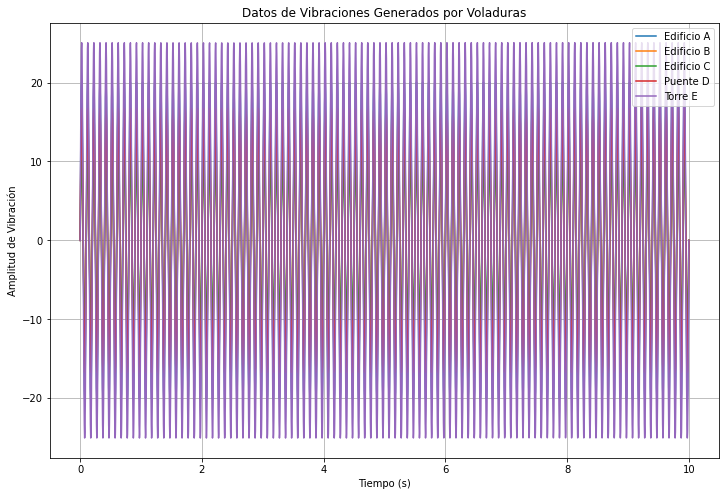

In [20]:
# Visualización de los datos de vibraciones
plt.figure(figsize=(12, 8))

for estructura, vibracion_total in datos_vibraciones:
    plt.plot(tiempo, vibracion_total, label=estructura)
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud de Vibración')
plt.title('Datos de Vibraciones Generados por Voladuras')
plt.legend()
plt.grid(True)
plt.show()

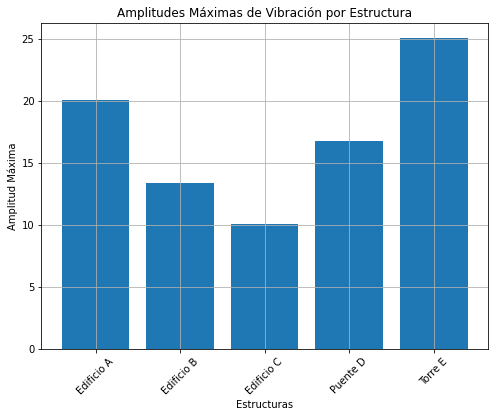

In [21]:
# Visualización de los valores estadísticos
plt.figure(figsize=(8, 6))
plt.bar(range(len(estructuras)), amplitudes_maximas)
plt.xticks(range(len(estructuras)), estructuras, rotation=45)
plt.xlabel('Estructuras')
plt.ylabel('Amplitud Máxima')
plt.title('Amplitudes Máximas de Vibración por Estructura')
plt.grid(True)
plt.show()

In [22]:
print('Amplitud Promedio:', amplitud_promedio)
print('Amplitud Máxima Global:', amplitud_maxima_global)
print('Estructura con Mayor Amplitud:', estructura_maxima)

Amplitud Promedio: 17.06418362301225
Amplitud Máxima Global: 25.053147484310973
Estructura con Mayor Amplitud: Torre E


In [23]:
# Cálculo de la matriz de correlación
correlaciones = np.zeros((len(estructuras), len(estructuras)))

for i in range(len(estructuras)):
    for j in range(len(estructuras)):
        correlacion = np.corrcoef(datos_vibraciones[i][1], datos_vibraciones[j][1])[0, 1]
        correlaciones[i, j] = correlacion

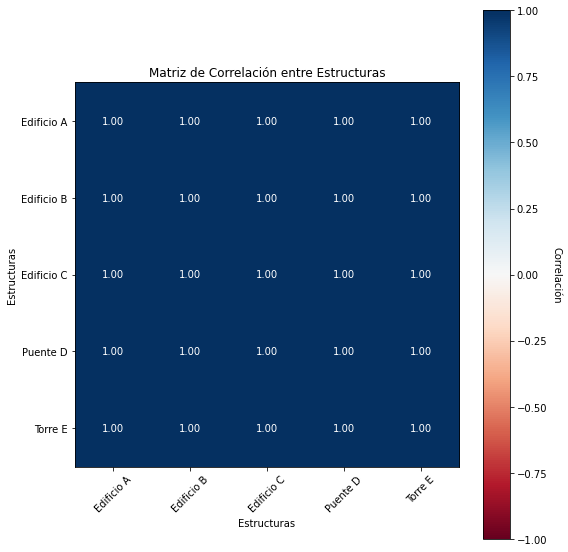

In [24]:
# Visualización de la matriz de correlación
fig, ax = plt.subplots(figsize=(8, 8))
im = ax.imshow(correlaciones, cmap='RdBu', vmin=-1, vmax=1)

# Configuración de ejes y etiquetas
ax.set_xticks(range(len(estructuras)))
ax.set_yticks(range(len(estructuras)))
ax.set_xticklabels(estructuras, rotation=45)
ax.set_yticklabels(estructuras)
ax.set_xlabel('Estructuras')
ax.set_ylabel('Estructuras')
ax.set_title('Matriz de Correlación entre Estructuras')

# Agregar valores en cada celda
for i in range(len(estructuras)):
    for j in range(len(estructuras)):
        ax.text(j, i, '{:.2f}'.format(correlaciones[i, j]), ha='center', va='center', color='w')

# Agregar barra de color
cbar = ax.figure.colorbar(im)
cbar.ax.set_ylabel('Correlación', rotation=-90, va='bottom')

# Mostrar la figura
plt.tight_layout()
plt.show()

In [25]:
# Análisis de frecuencias dominantes en las vibraciones
frecuencias_dominantes = []

for estructura, vibracion_total in datos_vibraciones:
    transformada = np.fft.fft(vibracion_total)
    frecuencias = np.fft.fftfreq(len(vibracion_total), tiempo[1] - tiempo[0])
    amplitudes = np.abs(transformada)
    indice_maxima_amplitud = np.argmax(amplitudes)
    frecuencia_dominante = frecuencias[indice_maxima_amplitud]
    frecuencias_dominantes.append((estructura, frecuencia_dominante))

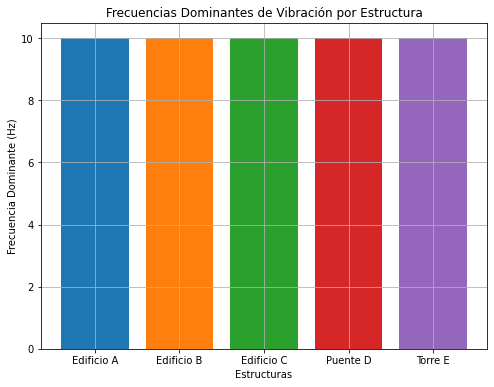

In [26]:
# Visualización de las frecuencias dominantes
plt.figure(figsize=(8, 6))
for estructura, frecuencia_dominante in frecuencias_dominantes:
    plt.bar(estructura, frecuencia_dominante)
plt.xlabel('Estructuras')
plt.ylabel('Frecuencia Dominante (Hz)')
plt.title('Frecuencias Dominantes de Vibración por Estructura')
plt.grid(True)
plt.show()